In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sndata
from sndata.sdss import Sako18Spec

In [2]:
sako = Sako18Spec()
sako.download_module_data()

In [3]:
group = pd.read_csv('~/Desktop/Research/SN-Spectral-Evolution/results/final_sdss.csv')
group['obj_id'] = group['obj_id'].astype(str)
group = group.set_index('obj_id')
group.head()

,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes
obj_id,,,,,,,,,,,,,,,,
739,2453622.5,pW1,3671.822467,3919.173035,11423.931678,0.0,133.032825,58.548298,0.0,3.181248,3.360168e-15,0.0,2.452360e-16,0,0,NaN
739,2453622.5,pW3,3919.173035,4613.067992,NaN,0.0,NaN,142.670444,0.0,11.190827,1.231454e-14,0.0,1.070385e-15,0,0,NaN
739,2453622.5,pW4,4613.067992,5302.585063,14126.441955,0.0,215.218064,159.769980,0.0,3.780944,1.593680e-14,0.0,5.054982e-16,0,0,NaN
739,2453622.5,pW5,5302.585063,5554.313517,4696.353615,0.0,751.312627,9.621969,0.0,2.929338,8.345654e-16,0.0,2.614292e-16,0,0,NaN
739,2453622.5,pW6,5554.313517,5847.631891,14164.882385,0.0,217.532693,26.798596,0.0,2.899821,2.198474e-15,0.0,2.623130e-16,0,0,NaN


In [4]:
def extract_feature_data(df, feature_name):
    feature_data = df[df['feat_name']==feature_name]
    is_good_spec_flag = feature_data['spec_flag'] == 0
    is_good_feat_flag = feature_data['feat_flag'] == 0
    return feature_data[is_good_spec_flag & is_good_feat_flag]

In [5]:
group6 = extract_feature_data(group, 'pW6')
group7 = extract_feature_data(group, 'pW7')

In [6]:
def append_peakJD(df):
    df = df.copy()
    table_m = sako.load_table('master').to_pandas()
    table_m = table_m.dropna(subset=['PeakMJDSALT2flat'])
    table_m = table_m.rename({'CID':'obj_id'}, axis = 'columns')
    table_m = table_m.set_index('obj_id')
    
    JD = table_m['PeakMJDSALT2flat'] + 2400000.5
    df['peakJD'] = JD
    return df

In [7]:
group6 = append_peakJD(group6)
group7 = append_peakJD(group7)
group6

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TableReplaceWarning: converted column 'ndofSALT2zspec' from integer to float
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TableReplaceWarning: converted column 'ndofMLCS2k2zspec' from integer to float
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TableReplaceWarning: converted column 'lcqualityIaPSNIDzspec' from integer to float
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TableReplaceWarning: converted column 'lcqualityIbcPSNIDzspec' from integer to float
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TableReplaceWarning: converted column 'lcqualityIIPSNIDzspec' from integer to float
  """Entry point for launching an IPython kernel.
/

,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes,peakJD
obj_id,,,,,,,,,,,,,,,,,
739,2453622.5,pW6,5554.313517,5847.631891,14164.882385,0.0,217.532693,26.798596,0.0,2.899821,2.198474e-15,0.0,2.623130e-16,0,0,NaN,NaN
774,2453622.5,pW6,5560.116150,5861.717097,13686.271031,0.0,202.914743,26.565879,0.0,2.398171,2.531752e-15,0.0,2.495995e-16,0,0,NaN,NaN
1032,2453638.5,pW6,5550.565407,5835.892816,12930.221014,0.0,654.625862,22.600921,0.0,2.896888,1.237527e-15,0.0,1.715299e-16,0,0,NaN,2453627.0
1112,2453639.5,pW6,5553.997622,5973.741145,9293.417907,0.0,1275.595178,39.503269,0.0,11.793263,4.499743e-16,0.0,1.424368e-16,0,0,NaN,2453630.4
1166,2453641.5,pW6,5619.591308,5971.343837,-488.630841,0.0,32587.101383,64.941750,0.0,20.728825,9.358225e-17,0.0,3.572438e-17,0,0,NaN,2453631.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111,2454412.5,pW6,5690.042863,5838.953873,9007.280217,0.0,12215.753645,12.446460,0.0,2.332324,1.978388e-16,0.0,4.054606e-17,0,0,NaN,2454410.2
20350,2454408.5,pW6,5635.307532,5983.408273,9456.474476,0.0,132.468772,69.374542,0.0,6.464790,1.021296e-15,0.0,1.194330e-16,0,0,NaN,2454412.9
20889,2454414.5,pW6,5604.933612,5821.670276,11985.503935,0.0,111.248067,31.750885,0.0,4.201581,5.264424e-16,0.0,8.427910e-17,0,0,NaN,NaN


In [8]:
group6['phase'] = group6['time'] - group6['peakJD']
group7['phase'] = group7['time'] - group7['peakJD']
group7

,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes,peakJD,phase
obj_id,,,,,,,,,,,,,,,,,,
739,2453622.5,pW7,5847.631891,6598.439368,9437.280976,0.0,815.930845,58.934676,0.0,14.637446,4.887388e-15,0.0,1.226211e-15,0,0,NaN,NaN,NaN
762,2453622.5,pW7,5994.191407,6319.806763,9570.397953,0.0,403.115115,51.070645,0.0,8.130427,1.712947e-15,0.0,3.016458e-16,0,0,NaN,2453625.6,-3.1
774,2453622.5,pW7,5861.717097,6589.107615,6386.485195,0.0,993.507287,82.599749,0.0,7.597359,8.294843e-15,0.0,8.450107e-16,0,0,NaN,NaN,NaN
1032,2453638.5,pW7,5835.892816,6569.591869,5159.105315,0.0,1844.056592,60.245386,0.0,13.598562,3.513998e-15,0.0,8.636822e-16,0,0,NaN,2453627.0,11.5
1112,2453639.5,pW7,5973.741145,6583.624895,3120.297047,0.0,1310.223396,140.755168,0.0,32.673021,1.817566e-15,0.0,5.143233e-16,0,0,NaN,2453630.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20350,2454408.5,pW7,5978.419597,6339.259229,10514.245125,0.0,85.047845,152.996304,0.0,8.153456,2.544509e-15,0.0,2.099612e-16,0,0,NaN,2454412.9,-4.4
20889,2454414.5,pW7,5821.670276,6344.827741,12463.818745,0.0,98.986992,146.121338,0.0,10.025474,2.339060e-15,0.0,2.132980e-16,0,0,NaN,NaN,NaN
21006,2454417.5,pW7,5932.665633,6410.061373,9497.078962,0.0,54.996890,127.468964,0.0,11.059947,6.096225e-16,0.0,6.923056e-17,0,0,NaN,NaN,NaN


In [9]:
group6 = group6.reset_index()
group7 = group7.reset_index()

group6 = group6.set_index(['obj_id', 'time'])
group7 = group7.set_index(['obj_id', 'time'])

### Classifying
Boundaries pulled from https://iopscience.iop.org/article/10.1088/0004-637X/773/1/53/pdf

CL SNe: pW6 (Si ii 5972) > 30 Å,

BL SNe: pW7 (Si ii 6355) > 105 Å and pW6 (Si ii 5972) < 30 Å,

SS SNe: pW7 (Si ii 6355) < 70 Å,

CN SNe: 70 <= pW7 (Si ii 6355) <= 105 Å and pW6 (Si ii 5972) <= 30 Å.

In [10]:
#interpolate 6 and 7 for peak values, then create new df for peak of 6 and 7, and plot 2 columns. 

In [11]:
joined = group6.join(group7, lsuffix = '6', rsuffix = '7')
joined.dropna(subset = ['pew6' , 'pew7'])
joined

,,feat_name6,feat_start6,feat_end6,vel6,vel_err6,vel_samperr6,pew6,pew_err6,pew_samperr6,area6,...,pew_err7,pew_samperr7,area7,area_err7,area_samperr7,spec_flag7,feat_flag7,notes7,peakJD7,phase7
obj_id,time,,,,,,,,,,,,,,,,,,,,,
739,2453622.5,pW6,5554.313517,5847.631891,14164.882385,0.0,217.532693,26.798596,0.0,2.899821,2.198474e-15,...,0.0,14.637446,4.887388e-15,0.0,1.226211e-15,0.0,0.0,NaN,NaN,NaN
774,2453622.5,pW6,5560.116150,5861.717097,13686.271031,0.0,202.914743,26.565879,0.0,2.398171,2.531752e-15,...,0.0,7.597359,8.294843e-15,0.0,8.450107e-16,0.0,0.0,NaN,NaN,NaN
1032,2453638.5,pW6,5550.565407,5835.892816,12930.221014,0.0,654.625862,22.600921,0.0,2.896888,1.237527e-15,...,0.0,13.598562,3.513998e-15,0.0,8.636822e-16,0.0,0.0,NaN,2453627.0,11.5
1112,2453639.5,pW6,5553.997622,5973.741145,9293.417907,0.0,1275.595178,39.503269,0.0,11.793263,4.499743e-16,...,0.0,32.673021,1.817566e-15,0.0,5.143233e-16,0.0,0.0,NaN,2453630.4,9.1
1166,2453641.5,pW6,5619.591308,5971.343837,-488.630841,0.0,32587.101383,64.941750,0.0,20.728825,9.358225e-17,...,0.0,25.240712,2.215036e-16,0.0,5.220292e-17,0.0,0.0,NaN,2453631.3,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111,2454412.5,pW6,5690.042863,5838.953873,9007.280217,0.0,12215.753645,12.446460,0.0,2.332324,1.978388e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20350,2454408.5,pW6,5635.307532,5983.408273,9456.474476,0.0,132.468772,69.374542,0.0,6.464790,1.021296e-15,...,0.0,8.153456,2.544509e-15,0.0,2.099612e-16,0.0,0.0,NaN,2454412.9,-4.4
20889,2454414.5,pW6,5604.933612,5821.670276,11985.503935,0.0,111.248067,31.750885,0.0,4.201581,5.264424e-16,...,0.0,10.025474,2.339060e-15,0.0,2.132980e-16,0.0,0.0,NaN,NaN,NaN


In [21]:
cl_data = joined[(joined['pew6'] > 30)]
cl_data.dropna(subset = ['pew6', 'pew7'])
cl_data = cl_data.loc[:,~cl_data.columns.duplicated()]

bl_data = joined[(joined['pew6']<30) & (joined['pew7']>105)]
bl_data.dropna(subset = ['pew6', 'pew7'])
bl_data = bl_data.loc[:,~bl_data.columns.duplicated()]

ss_data = joined[joined['pew7']<70]
ss_data.dropna(subset = ['pew6', 'pew7'])
ss_data = ss_data.loc[:,~ss_data.columns.duplicated()]

cn_data3 = joined[70 <= joined['pew7']]
cn_data2 = cn_data3[cn_data3['pew7'] <=105]
cn_data = cn_data2[cn_data2['pew6'] <= 30]
cn_data.dropna(subset = ['pew6', 'pew7'])
cn_data = cn_data.loc[:,~cn_data.columns.duplicated()]
cn_data.head()

,,feat_name6,feat_start6,feat_end6,vel6,vel_err6,vel_samperr6,pew6,pew_err6,pew_samperr6,area6,...,pew_err7,pew_samperr7,area7,area_err7,area_samperr7,spec_flag7,feat_flag7,notes7,peakJD7,phase7
obj_id,time,,,,,,,,,,,,,,,,,,,,,
774,2453622.5,pW6,5560.116150,5861.717097,13686.271031,0.0,202.914743,26.565879,0.0,2.398171,2.531752e-15,...,0.0,7.597359,8.294843e-15,0.0,8.450107e-16,0.0,0.0,NaN,NaN,NaN
2031,2453636.5,pW6,5667.382584,5877.806020,8176.797619,0.0,1102.615444,19.858065,0.0,6.526542,1.849588e-15,...,0.0,10.811039,7.682873e-15,0.0,1.080701e-15,0.0,0.0,NaN,2453637.0,-0.5
2422,2453641.5,pW6,5627.754253,5834.399781,13435.647210,0.0,1866.067572,11.398965,0.0,6.189991,9.270937e-17,...,0.0,15.698626,6.051210e-16,0.0,1.286351e-16,0.0,0.0,NaN,2453639.3,2.2
2916,2453644.5,pW6,5646.531964,5944.099777,8791.600710,0.0,218.468389,16.940968,0.0,2.058575,8.401049e-16,...,0.0,1.450731,3.548561e-15,0.0,8.174135e-17,0.0,0.0,NaN,2453644.6,-0.1
2992,2453650.5,pW6,5578.391511,5913.989089,12309.387664,0.0,729.776201,26.355065,0.0,5.740537,2.358456e-15,...,0.0,3.836515,6.990840e-15,0.0,4.267560e-16,0.0,0.0,NaN,2453641.2,9.3


In [13]:
def intersection(lst1, lst2): 
    '''
    return intersection of two lists
    
    args
    lst1 - first list to be compared
    lst2 - second list to be compared
    
    returns
    (set(lst1) & set(lst2)) - intersection of both lists'''
    return (set(lst1) & set(lst2))

In [14]:
#interpolating data
def subclass_data(df):
    '''return x and y lists of data to plot
    
    args
    df - specific dataframe with only measurements that fit a certain subclass
    
    returns
    my_list_x - list of pW7 measurements interpolated to tBmax
    my_list_y - list of pW6 measurements interpolated to tBmax
    '''
    x = df['pew7']
    y = df['pew6']
    
    list1 = df.index.tolist()
    ids = [i[0] for i in list1]
    ids = np.unique(ids)
    
    both1 = intersection(x, y)
    
    df.reset_index()
    
    my_list_x = []
    my_list_y = []
    
    for obj_id in ids:
        df2 = df.loc[obj_id]
        t0_measure_x = np.interp(0, df2['phase7'], df2['pew7'])
        my_list_x.append(t0_measure_x)
        t0_measure_y = np.interp(0, df2['phase6'], df2['pew6'])
        my_list_y.append(t0_measure_y)
    
    return my_list_x, my_list_y

In [15]:
clx, cly = subclass_data(cl_data)
blx, bly = subclass_data(bl_data)
ssx, ssy = subclass_data(ss_data)
cnx, cny = subclass_data(cn_data)

In [16]:
clx = cl_data['pew7']
cly = cl_data['pew6']
blx = bl_data['pew7']
bly = bl_data['pew6']
ssx = ss_data['pew7']
ssy = ss_data['pew6']
cnx = cn_data['pew7']
cny = cn_data['pew6']

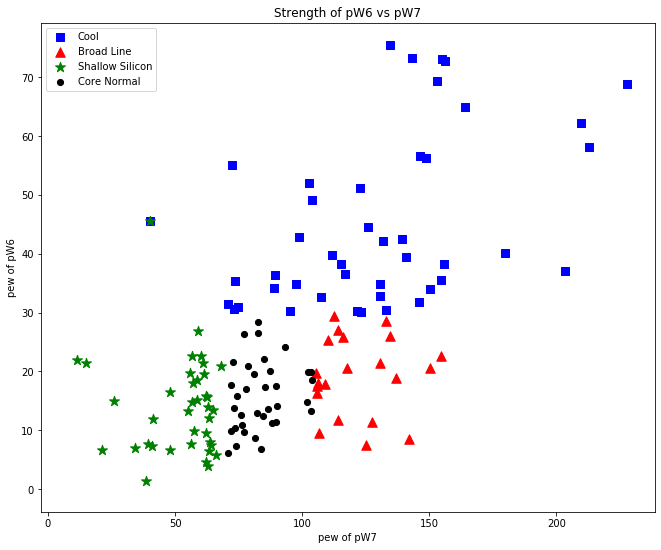

In [17]:
#cool
plt.scatter(clx , cly , label = 'Cool' , s = 50 , color = 'blue' , marker = 's')

#broad line
plt.scatter(blx , bly , label = 'Broad Line' , s = 90 , color = 'red' , marker = '^')

#shallow silicon
plt.scatter(ssx , ssy , label = 'Shallow Silicon' , s = 110 , color = 'green' , marker = '*')

#core normal
plt.scatter(cnx , cny , label = 'Core Normal' , s = 150 , color = 'black' , marker = '.')

plt.title('Strength of pW6 vs pW7')
plt.legend(loc = ('upper left'))
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11, 9)
#plt.savefig('final_pw6_vs_pw7')